# Notebook for Curface Creek Sandstone pmag compilation

## import packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm

%config InlineBackend.figure_format = 'retina'

In [2]:
Cutface_specimens = pd.read_csv('../data/Pmag/cutface/specimens.txt', sep='\t', header=1)

Cutface_lat = 47.73055
Cutface_lon = -90.44128

## Plot directions

In [3]:
specimens_lt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_lt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_mt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_mt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_ht_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_ht_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

In [5]:
specimens_lt_geo.head()

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,meas_step_max,meas_step_min,meas_step_unit,analysts,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,specimen_name
4,CF-10a,CF-10a_LP-DIR-T,CF-10,NaN,lt,3.9,69.6,3.0,3.0,0.0,27.2,5.3,473.0,273.0,K,NaN,hargrave 2020-11-24 21:43:43,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-10a
14,CF-11a,CF-11a_LP-DIR-T,CF-11,NaN,lt,5.1,69.6,3.0,3.0,0.0,25.2,15.3,473.0,273.0,K,NaN,hargrave 2020-11-22 16:19:20,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-11a
23,CF-12a,CF-12a_LP-DIR-T,CF-12,NaN,lt,290.5,84.2,3.0,3.0,0.0,18.1,19.6,473.0,273.0,K,NaN,hargrave 2020-11-22 16:20:48,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-12a
36,CF-13a,CF-13a_LP-DIR-T,CF-13,NaN,lt,355.6,69.7,3.0,3.0,0.0,25.4,3.7,473.0,273.0,K,NaN,hargrave 2020-11-24 21:45:14,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-13a
40,CF-14a,CF-14a_LP-DIR-T,CF-14,NaN,lt,357.6,62.0,3.0,3.0,0.0,35.2,2.6,473.0,273.0,K,NaN,hargrave 2020-11-24 21:46:50,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-14a


In [6]:
mean_lt = ipmag.fisher_mean(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist())
mean_lt

{'dec': 356.06851570144954,
 'inc': 68.89309013914682,
 'n': 80,
 'r': 78.32095196283655,
 'k': 47.05047041623705,
 'alpha95': 2.3325359741086515,
 'csd': 11.808725679558147}

In [7]:
mean_mt = ipmag.fisher_mean(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
mean_mt

{'dec': 287.59907075164693,
 'inc': 43.08903357132322,
 'n': 85,
 'r': 82.94677296168189,
 'k': 40.91120876179774,
 'alpha95': 2.4293180585411673,
 'csd': 12.663794755130121}

In [8]:
mean_ht = ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())
mean_ht

{'dec': 285.16969864407184,
 'inc': 28.861211822970073,
 'n': 81,
 'r': 78.45123336865939,
 'k': 31.387730448244774,
 'alpha95': 2.853202296656733,
 'csd': 14.457894845129493}

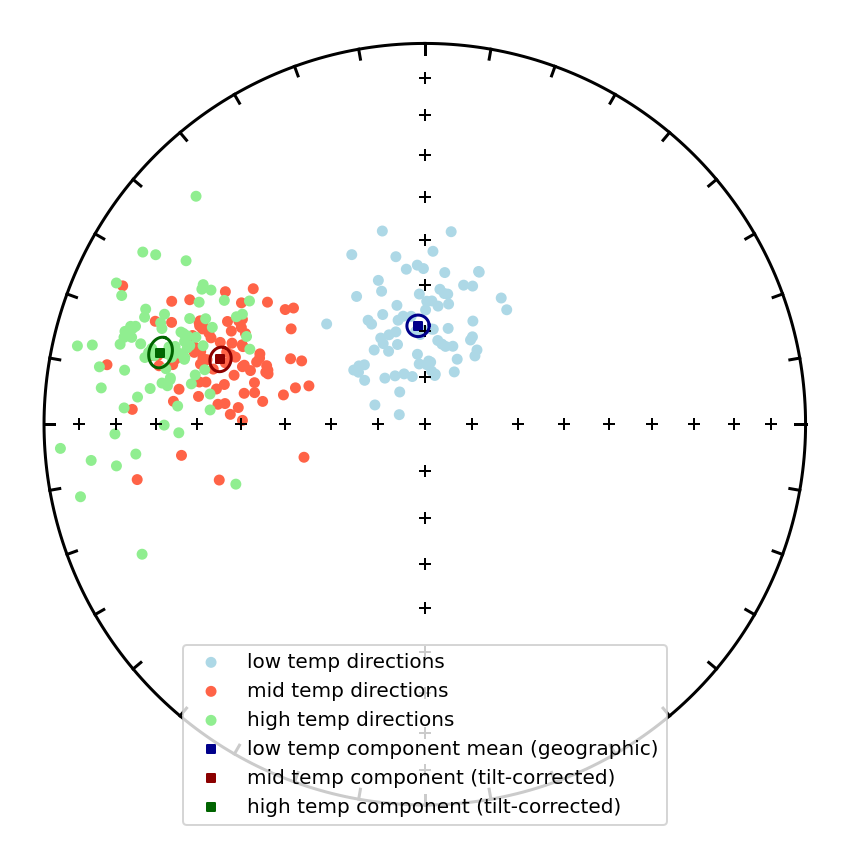

In [9]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='lightblue',label='low temp directions')
ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='tomato',label='mid temp directions')
ipmag.plot_di(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist(),color='lightgreen',label='high temp directions')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component mean (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
plt.savefig('code_output/specimen_directions.pdf')
plt.show()

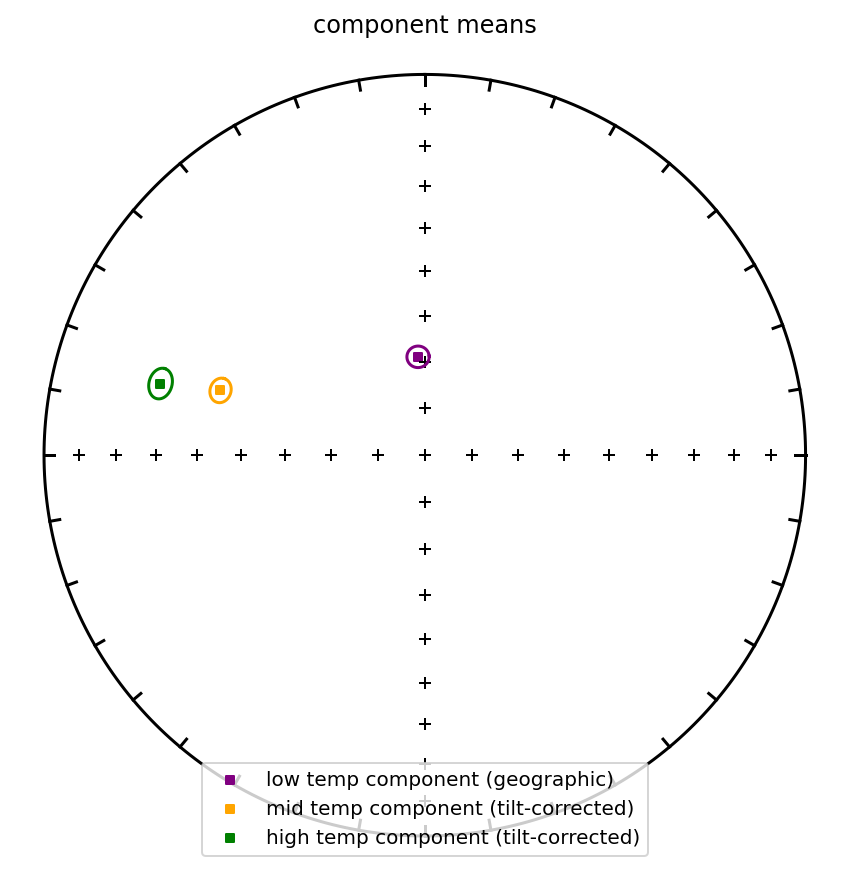

In [10]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='purple', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='orange', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='green', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
plt.title('component means')
plt.show()

## Plot IGRF, dipole, CF, and NSVG together

### Local geomagnetic field 

Calculate the local geomagnetic field at the study site both using the IGRF model and the long-term dipole field using the dipole equation.

In [13]:
local_igrf = ipmag.igrf([2020.7664, 188, Cutface_lat, Cutface_lon])
local_igrf_dec = local_igrf[0]
local_igrf_inc = local_igrf[1]

local_dipole_dec = 0
local_dipole_inc = ipmag.inc_from_lat(Cutface_lat)

## Expected direction from NSVG

Here we take the NSVG upper northeast sequence pole as calculated in Swanson-Hysell et al. 2019 and determine the predicted direction for the Cutface Creek section.

In [14]:
NSVG_pole_lat = 31.1 
NSVG_pole_lon = 181.7
NSVG_A95 = 4.2

NSVG_dec, NSVG_inc = pmag.vgp_di(NSVG_pole_lat,NSVG_pole_lon,Cutface_lat, Cutface_lon)

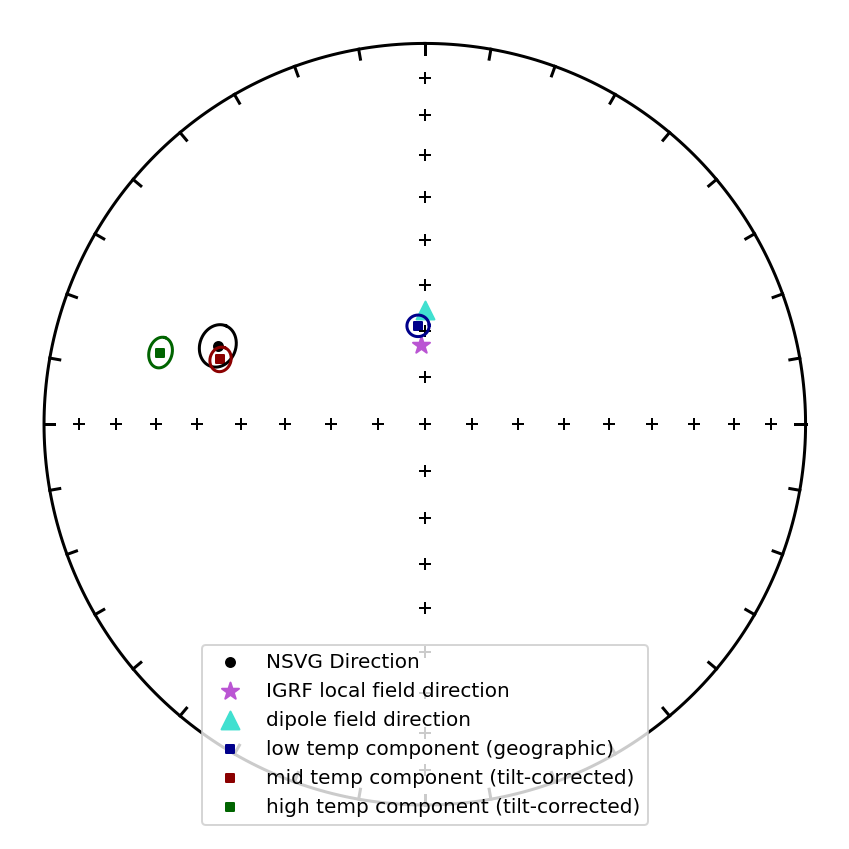

In [29]:
cf_igrf_nsvg_stereonet=plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction') #need to replace with direction A95
ipmag.plot_di([local_igrf_dec],[local_igrf_inc], marker = '*', label='IGRF local field direction', markersize=80, color='mediumorchid')
ipmag.plot_di([local_dipole_dec],[local_dipole_inc], marker = '^',label='dipole field direction',markersize=80, color='turquoise')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
cf_igrf_nsvg_stereonet.savefig('code_output/cf_igrf_nsvg_stereonet.pdf', bbox_inches='tight')
plt.show()

## Empirical flattening factor determination

$tan(I_{observed}) = f*tan(I_{field})$

$I_{observed}$ : inclination of sedimentary rock \
$I_{field}$ : inclination of local magnetic field when rock was magnetized \
$f$ : flattening factor

$f = tan(I_{observed})/tan(I_{field})$

In [17]:
f_factor_ht_mt = np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(mean_mt['inc']))
f_factor_ht_mt

0.5891942126253275

In [18]:
f_factor_ht_NSVG = np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(NSVG_inc))
f_factor_ht_NSVG

0.6244324413212862

**We need to progressive unflattening the ht directions and conduct common mean tests with the population of NSVG NE directions to determine the range of f factors.**

'high temp component (f=0.62 corrected)'

In [22]:
ht_incs_NSVG_unsquish = ipmag.unsquish(specimens_ht_tc['dir_inc'].tolist(), f_factor_ht_NSVG)
# calculate mean direction of high temp component after unsquishing
ht_mean_NSVG_unsquish = ipmag.fisher_mean(dec=specimens_ht_tc['dir_dec'].tolist(), inc=ht_incs_NSVG_unsquish)

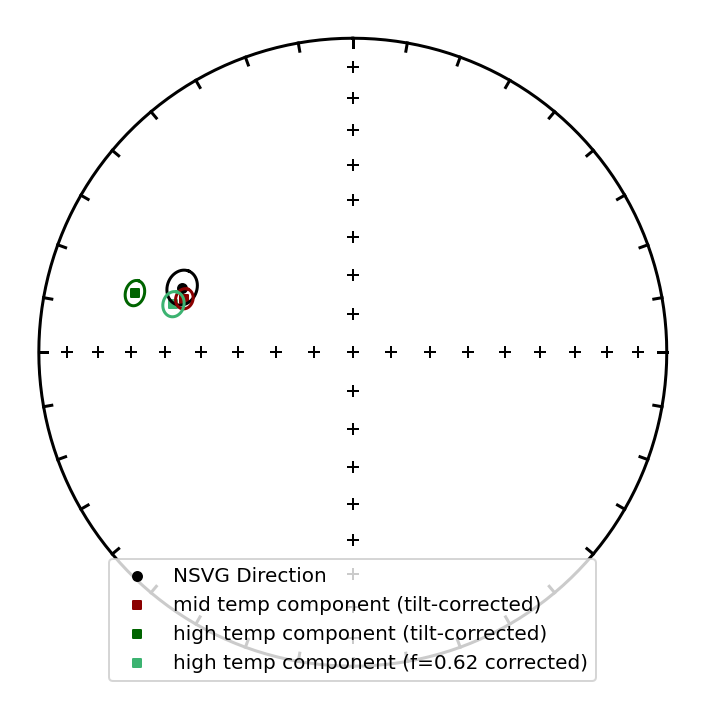

In [30]:
cf_igrf_nsvg_stereonet=plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction') #need to replace with direction A95

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

unsquish_label = 'high temp component (f=' + str(np.round(f_factor_ht_NSVG,2)) +  ' corrected)'
ipmag.plot_di_mean(ht_mean_NSVG_unsquish['dec'],ht_mean_NSVG_unsquish['inc'],ht_mean_NSVG_unsquish['alpha95'],
                   color='mediumseagreen', marker = 's', label=unsquish_label)

plt.legend(loc=8)
plt.show()

## let's try different unsquishing factors

In [31]:
def unsquish_factors(decs, incs, n=5):
    # this function explores different unsquishing factors upon CF ht directions
    fignum = 1
    plt.figure(num=fignum,figsize=(8,8))
    ipmag.plot_net(fignum)
    factors = np.linspace(0.1,1, num=n)
    
    undquished_mean_list = [] 
    for i in range(len(factors)):
        unsquished_incs = ipmag.unsquish(incs , factors[i])
        unsquished_mean = ipmag.fisher_mean(decs, unsquished_incs)
        undquished_mean_list.append(unsquished_mean)
        ipmag.plot_di_mean(unsquished_mean['dec'],unsquished_mean['inc'],unsquished_mean['alpha95'],
                   color='C'+str(i), marker = 'd', label='high temp component unsquished with factor '+str(round(factors[i], 1)))
    plt.legend(loc=8)
    return undquished_mean_list
# calculate mean direction of high temp component after unsquishing

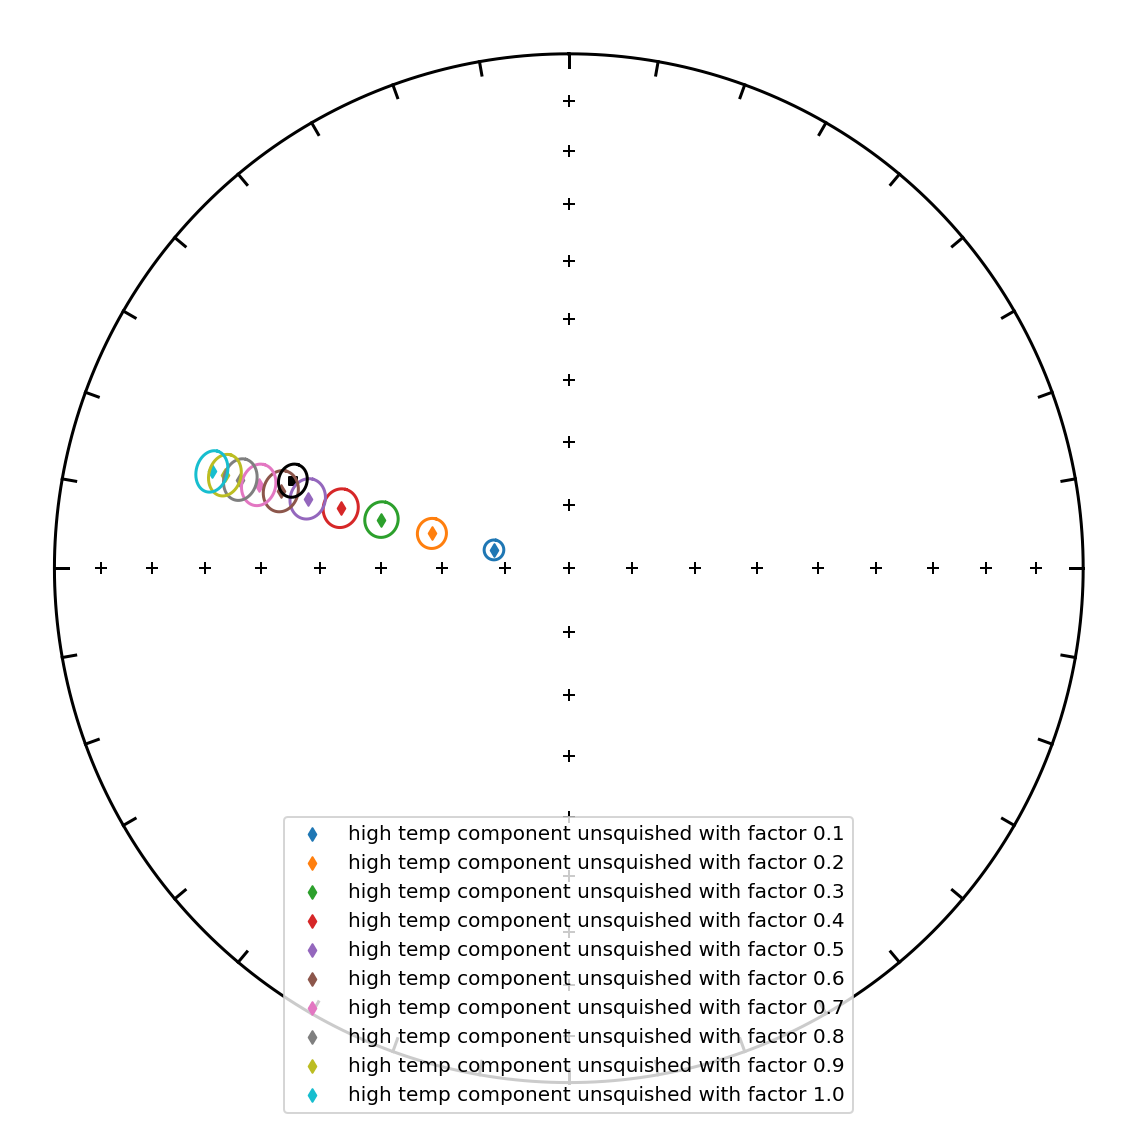

In [32]:
CF_undquished_mean_list = unsquish_factors(specimens_ht_tc['dir_dec'].tolist(), specimens_ht_tc['dir_inc'].tolist(), n=10) 
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='black', marker = 's', label='mid temp component (tilt-corrected)')

In [33]:
CF_undquished_mean_list[:5]

[{'dec': 283.7301664325479,
  'inc': 77.84174558750536,
  'n': 81,
  'r': 80.22310173186067,
  'k': 102.97358519230511,
  'alpha95': 1.5576442197914293,
  'csd': 7.982190752905941},
 {'dec': 284.2497787938802,
  'inc': 67.6032374134344,
  'n': 81,
  'r': 79.28278911253572,
  'k': 46.58717259714805,
  'alpha95': 2.329564894389549,
  'csd': 11.86729783515034},
 {'dec': 284.549685610912,
  'inc': 59.13291567185021,
  'n': 81,
  'r': 78.6807474969052,
  'k': 34.493872440904255,
  'alpha95': 2.7177095089950605,
  'csd': 13.791580616813377},
 {'dec': 284.740418735963,
  'inc': 52.15191493135675,
  'n': 81,
  'r': 78.36444196717143,
  'k': 30.35410300343161,
  'alpha95': 2.902991507758883,
  'csd': 14.701996570784292},
 {'dec': 284.8721839764361,
  'inc': 46.38646841459939,
  'n': 81,
  'r': 78.23408376142031,
  'k': 28.923507835899,
  'alpha95': 2.9764109082511103,
  'csd': 15.061198674624704}]

## plot everything as poles

<Figure size 360x360 with 0 Axes>

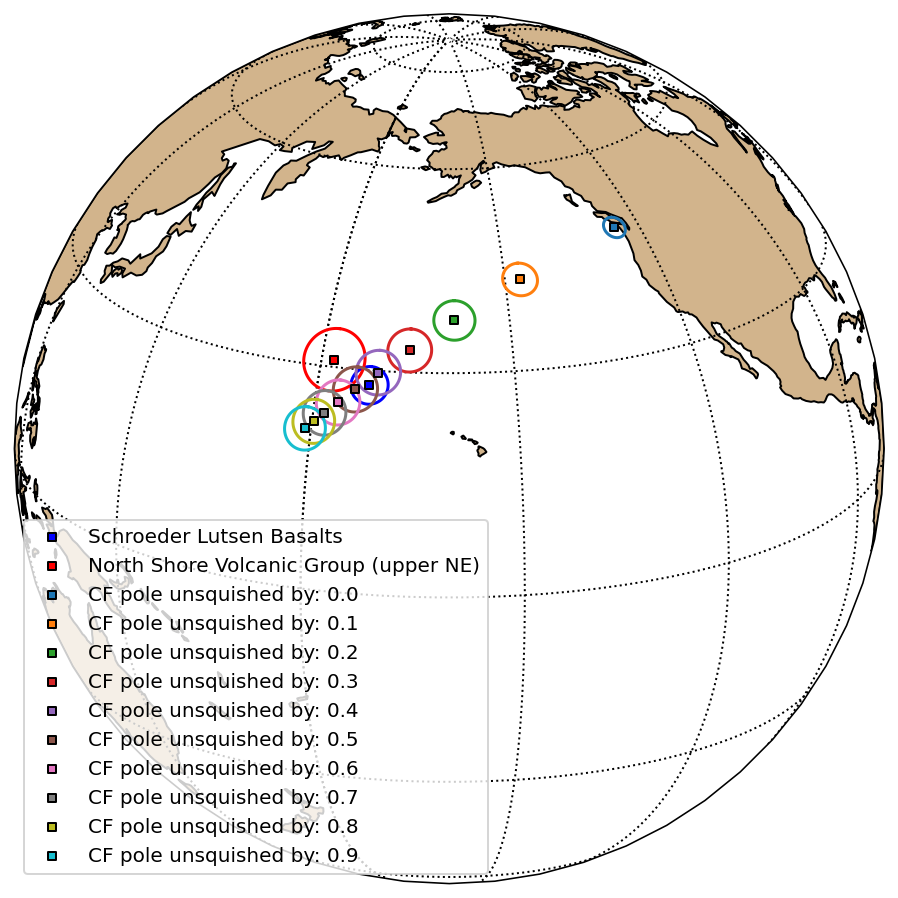

In [34]:
NSVG_NE_plon = 181.7
NSVG_NE_plat = 31.1

CF_lat = 47.7
CF_lon = -90.44

    
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis,188,28,2.5,label='Schroeder Lutsen Basalts', marker='s',color='Blue')
ipmag.plot_pole(map_axis,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

for i, mean_dir in enumerate(CF_undquished_mean_list):
    plon, plat, dp, dm = pmag.dia_vgp(mean_dir['dec'], mean_dir['inc'], mean_dir['alpha95'], CF_lat, CF_lon)
    
    ipmag.plot_pole(map_axis,plon,plat, mean_dir['alpha95'],label='CF pole unsquished by: '+ str(i/len(CF_undquished_mean_list)),
               marker='s',color='C'+str(i))

plt.legend()
plt.show()

## Plot theoretical expected inclination vs observed inclination

In [35]:
expected_incs = np.linspace(0,90,91)
expected_incs_rad = expected_incs*(np.pi/180)
measured_inc_f_9 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.9)
measured_inc_f_8 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.8)
measured_inc_f_7 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.7)
measured_inc_f_6 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.6)
measured_inc_f_5 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.5)
measured_inc_f_4 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.4)
measured_inc_f_3 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.3)
measured_inc_f_2 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.2)
measured_inc_f_1 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.1)
measured_inc_f_05 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.05)

In [36]:
NE_NSVG_inc = 40.3

nsvg_f_9 = ipmag.squish(NE_NSVG_inc,.9)
nsvg_f_8 = ipmag.squish(NE_NSVG_inc,.8)
nsvg_f_7 = ipmag.squish(NE_NSVG_inc,.7)
nsvg_f_6 = ipmag.squish(NE_NSVG_inc,.6)
nsvg_f_5 = ipmag.squish(NE_NSVG_inc,.5)
nsvg_f_4 = ipmag.squish(NE_NSVG_inc,.4)
nsvg_f_3 = ipmag.squish(NE_NSVG_inc,.3)

In [37]:
viridis = cm.get_cmap('viridis', 7)

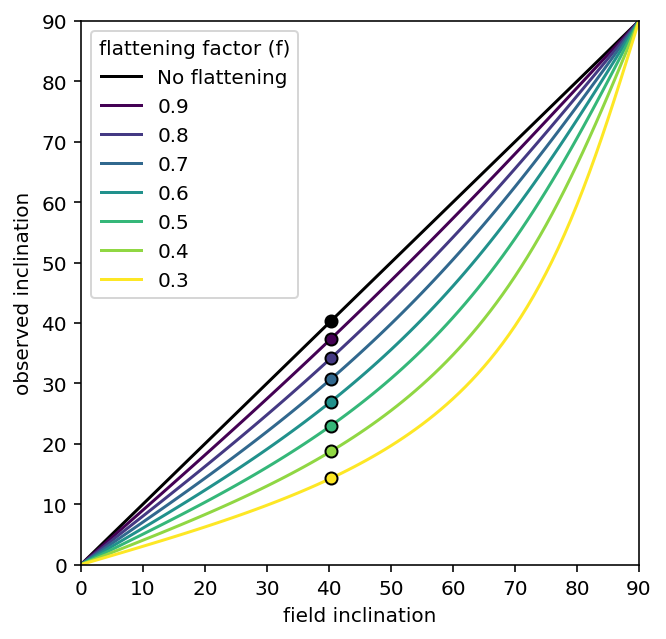

In [38]:
obs_vs_measure_plot = plt.figure(figsize=(5,5))
plt.plot([0,90],[0,90], label='No flattening', color='black')
plt.scatter(NE_NSVG_inc,NE_NSVG_inc,color='black',edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_9, label='0.9', color=viridis(0))
plt.scatter(NE_NSVG_inc,nsvg_f_9,color=viridis(0),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_8, label='0.8', color=viridis(1))
plt.scatter(NE_NSVG_inc,nsvg_f_8,color=viridis(1),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_7, label='0.7', color=viridis(2))
plt.scatter(NE_NSVG_inc,nsvg_f_7,color=viridis(2),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_6, label='0.6', color=viridis(3))
plt.scatter(NE_NSVG_inc,nsvg_f_6,color=viridis(3),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_5, label='0.5', color=viridis(4))
plt.scatter(NE_NSVG_inc,nsvg_f_5,color=viridis(4),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_4, label='0.4', color=viridis(5))
plt.scatter(NE_NSVG_inc,nsvg_f_4,color=viridis(5),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_3, label='0.3', color=viridis(6))
plt.scatter(NE_NSVG_inc,nsvg_f_3,color=viridis(6),edgecolors='black',zorder=100)
#plt.plot(expected_incs,measured_inc_f_2)
#plt.plot(expected_incs,measured_inc_f_1)
#plt.plot(expected_incs,measured_inc_f_05)
#plt.title('Corrected vs Observed Inclination')
plt.legend(title='flattening factor (f)')
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel('field inclination')
plt.ylabel('observed inclination')
obs_vs_measure_plot.savefig('code_output/field_vs_measure_plot.pdf', bbox_inches='tight')
plt.show()

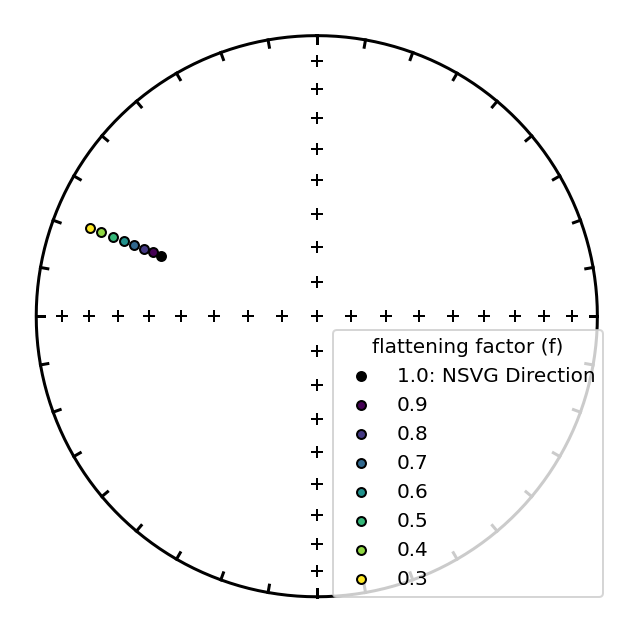

In [39]:
upper_nsvg_shallowing = plt.figure(num=fignum,figsize=(4.5,4.5))
ipmag.plot_net(fignum)
ipmag.plot_di(291.3, 40.3, label='1.0: NSVG Direction' )
ipmag.plot_di(291.3, nsvg_f_9, color=viridis(0), label='0.9',edge='black')
ipmag.plot_di(291.3, nsvg_f_8, color=viridis(1), label='0.8',edge='black')
ipmag.plot_di(291.3, nsvg_f_7, color=viridis(2), label='0.7',edge='black')
ipmag.plot_di(291.3, nsvg_f_6, color=viridis(3), label='0.6',edge='black')
ipmag.plot_di(291.3, nsvg_f_5, color=viridis(4), label='0.5',edge='black')
ipmag.plot_di(291.3, nsvg_f_4, color=viridis(5), label='0.4',edge='black')
ipmag.plot_di(291.3, nsvg_f_3, color=viridis(6), label='0.3',edge='black')
plt.legend(loc=8,title='flattening factor (f)',bbox_to_anchor=(0.75,0.02))
#plt.title('Shallowing of the Upper Northeast Sequence NSVG Direction', size=16)
upper_nsvg_shallowing.savefig('code_output/upper_nsvg_shallowing.pdf', bbox_inches='tight')
plt.show()

## Simulate draws from a Fisher distribution and squish them

In [24]:
NSVG_sim = ipmag.fishrot(k=30,n=100,dec=291.3,inc=40.3)
NSVG_sim_dec, NSVG_sim_inc, mag_moment = ipmag.unpack_di_block(NSVG_sim)

NSVG_sim_inc_squished = ipmag.squish(NSVG_sim_inc, 0.6)

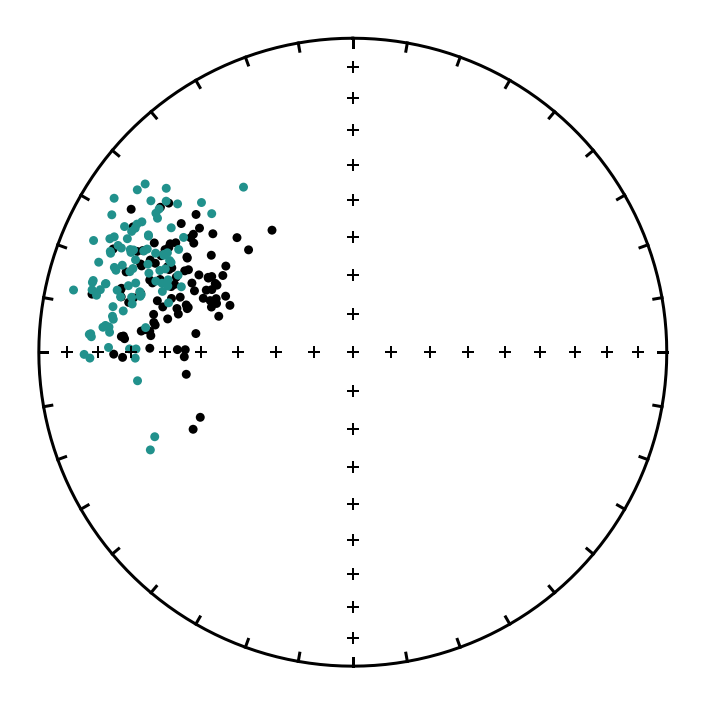

In [25]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc)
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc_squished,color=viridis(3))

In [26]:
NSVG_sim_mean = ipmag.fisher_mean(NSVG_sim_dec, NSVG_sim_inc)
NSVG_sim_mean

{'dec': 289.95499433354485,
 'inc': 38.40169870879314,
 'n': 100,
 'r': 97.15439966020081,
 'k': 34.79054968308946,
 'alpha95': 2.430824100468208,
 'csd': 13.732650699944706}

In [27]:
NSVG_sim_squished_mean = ipmag.fisher_mean(NSVG_sim_dec, NSVG_sim_inc_squished)
NSVG_sim_squished_mean

{'dec': 290.00184256783945,
 'inc': 25.918018606481258,
 'n': 100,
 'r': 97.10158478347017,
 'k': 34.15659683105353,
 'alpha95': 2.453949278782038,
 'csd': 13.859505083811758}

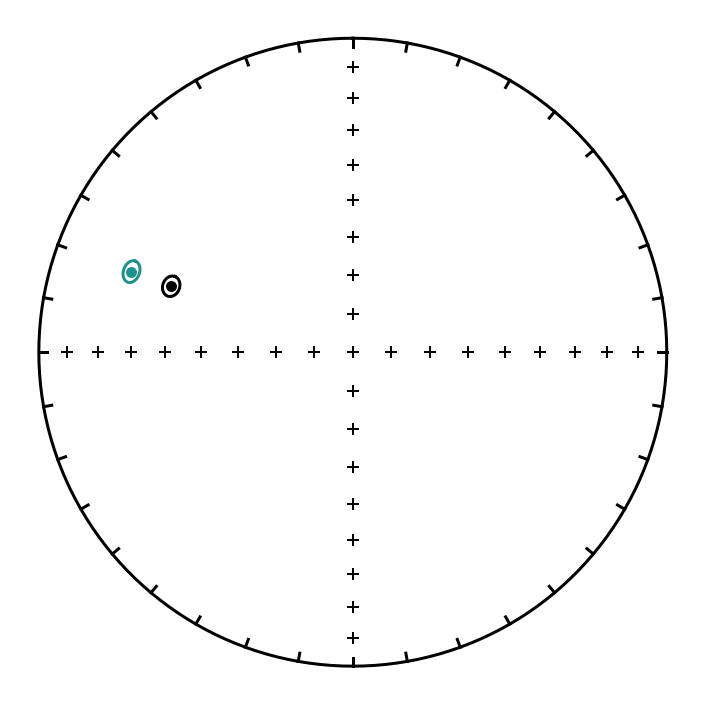

In [28]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di_mean(NSVG_sim_mean['dec'],NSVG_sim_mean['inc'],NSVG_sim_mean['alpha95'])
ipmag.plot_di_mean(NSVG_sim_squished_mean['dec'],NSVG_sim_squished_mean['inc'],
                   NSVG_sim_squished_mean['alpha95'],color=viridis(3))